## Exploratory Data Analysis

In [3]:
#imports

import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import datetime as dt

from wordcloud import WordCloud, STOPWORDS


In [5]:
# create the dataframe
cwd = os.getcwd()
df = pd.read_csv(cwd+"/cleaned-BA-reviews.csv", index_col=0)

#let's also check the index are in order
df = df.reset_index(drop=True)

In [7]:
df.head()

reviews  stars        date  \
0  ✅ Trip Verified |   My family and I were booke...    5.0  2024-08-09   
1  Not Verified |  We had to change from AA to BA...    1.0  2024-08-08   
2  ✅ Trip Verified | After paying $6500 for ticke...    2.0  2024-08-08   
3  ✅ Trip Verified | An excellent flight on BA Ci...    2.0  2024-08-07   
4  ✅ Trip Verified |   Crew were amazing and atte...    8.0  2024-08-07   

          country  verified                                             corpus  
0  United Kingdom      True  family booked leave london hong kong august ma...  
1   United States     False  verified change aa ba flight london missed con...  
2   United States      True  paying ticket family including pay sit togethe...  
3         Lebanon      True  excellent flight ba cityflyer plane clean comf...  
4  United Kingdom      True  crew amazing attentive nothing missed definite...

#### What is the average overall rating given for British Airways?

In [10]:
df.stars.mean()

4.585407725321889

#### What is the total counts for each ratings?


Text(0.5, 0.98, 'Counts for each ratings')

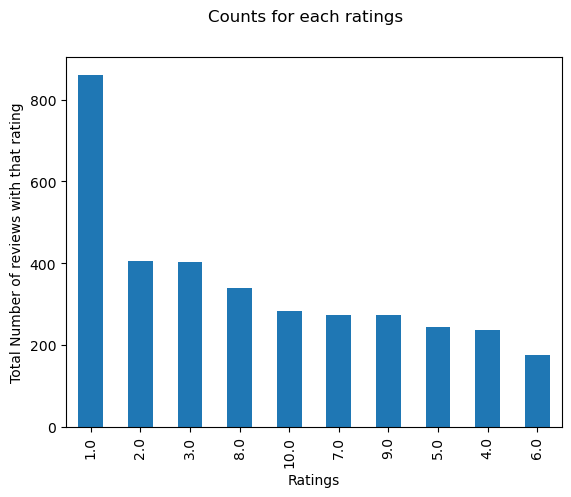

In [13]:
df.stars.value_counts().plot(kind="bar")
plt.xlabel("Ratings")
plt.ylabel("Total Number of reviews with that rating")
plt.suptitle("Counts for each ratings")

In [15]:
# renaming columns
df_ratings.rename(columns={'stars':'stars', 'count':'count'}, inplace=True)
df_ratings

NameError: name 'df_ratings' is not defined

In [ ]:
#resetting index as we do not want to confuse between the index and the rating values
df_ratings = df_ratings.reset_index()
df_ratings

In [18]:
df_ratings = pd.DataFrame(df['stars'].value_counts())
df_ratings = df['stars'].value_counts().reset_index(name='count')
df_ratings

stars  count
0    1.0    861
1    2.0    405
2    3.0    403
3    8.0    339
4   10.0    284
5    7.0    274
6    9.0    273
7    5.0    245
8    4.0    236
9    6.0    175

In [20]:
pct_values = (df_ratings['count']/ df_ratings['count'].sum() *100).tolist()
pct_values = [round(x,2) for x in pct_values]
df_ratings['pct_values'] = pct_values

In [22]:
df_ratings

stars  count  pct_values
0    1.0    861       24.64
1    2.0    405       11.59
2    3.0    403       11.53
3    8.0    339        9.70
4   10.0    284        8.13
5    7.0    274        7.84
6    9.0    273        7.81
7    5.0    245        7.01
8    4.0    236        6.75
9    6.0    175        5.01

Text(0.5, 1.0, 'Counts for each ratings')

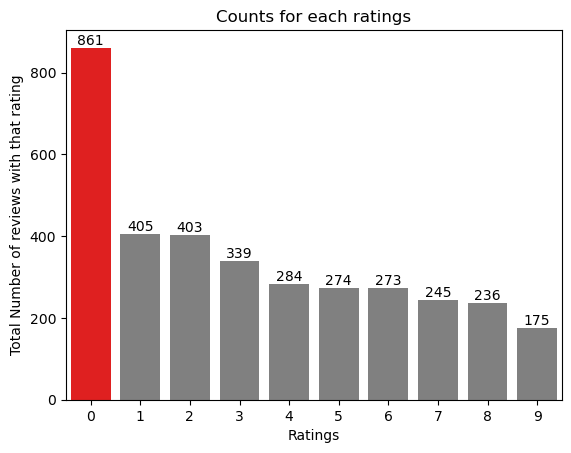

In [24]:
clrs = ['Red' if (x == df_ratings['count'].max()) else 'grey' for x in df_ratings['count']]
ax = sns.barplot(x=df_ratings.index, y=df_ratings['count'], data=df_ratings, errwidth=0, palette=clrs)
ax.bar_label(ax.containers[0])

ax.set_xlabel("Ratings")
ax.set_ylabel("Total Number of reviews with that rating")
ax.set_title("Counts for each ratings")

In [26]:
# Unique countries BA recieved the reviews from

print(f"{len(df.country.unique())} unique countries")

71 unique countries


#### Which country most review comes from?  

In [29]:
df_country_review = pd.DataFrame(df.country.value_counts().head()).reset_index()

Text(0.5, 1.0, 'Maximum number of review by country')

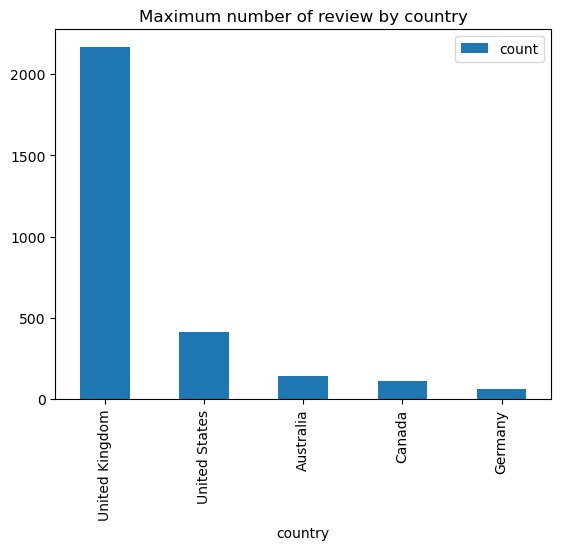

In [31]:
df_country_review.plot(kind="bar", x='country')
plt.title("Maximum number of review by country")

#### Which country provided on average highest ratings?

In [41]:
print(df['stars'].dtype)

float64


In [43]:
df_country_count = df_ratings['count'].dtype

In [45]:
df['stars'] = pd.to_numeric(df['stars'], errors='coerce')
df_country_rating = df.groupby('country')['stars'].mean().reset_index()
df_country_rating.sort_values(by='stars', ascending=False, inplace=True)

In [47]:
df_country_rating.rename(columns={'stars':'avg_rating'}, inplace=True)


Text(0.5, 1.0, 'Top 12 Countries with avg highest rating provided to British Airways')

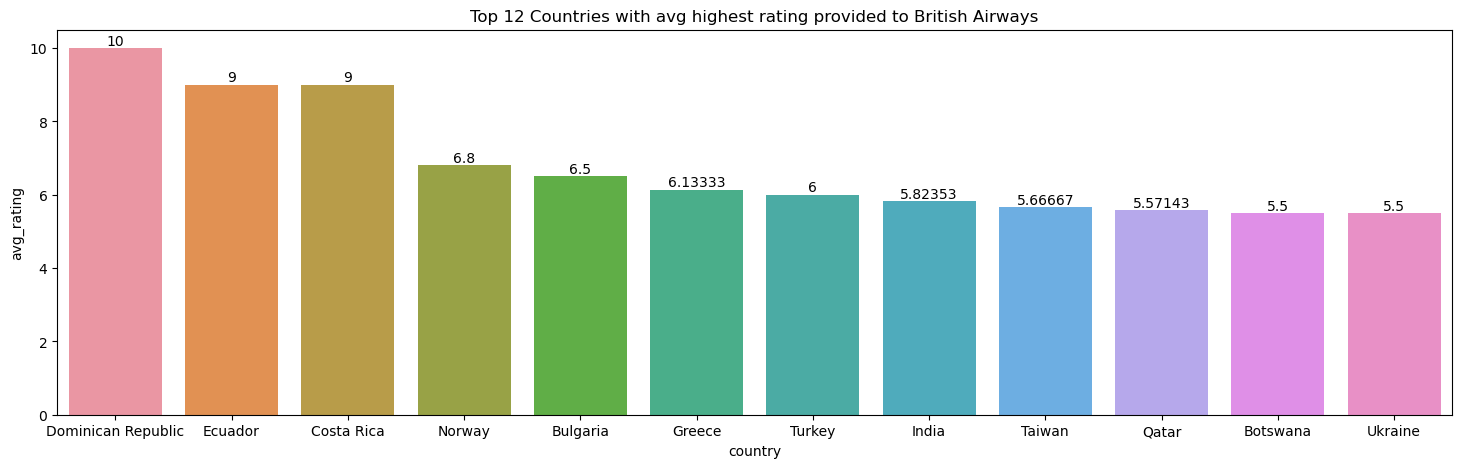

In [49]:
fig, ax = plt.subplots(figsize=(18,5))
ax1 = sns.barplot(x='country', y='avg_rating', data=df_country_rating[:12])
ax.bar_label(ax.containers[0])
ax.set_title("Top 12 Countries with avg highest rating provided to British Airways")

#### Time Series Analysis

In [52]:
#convert the date datatype to datetime

df.date = pd.to_datetime(df.date)

C:\Users\theak\anaconda3\Lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  v = v.dt.to_pydatetime()


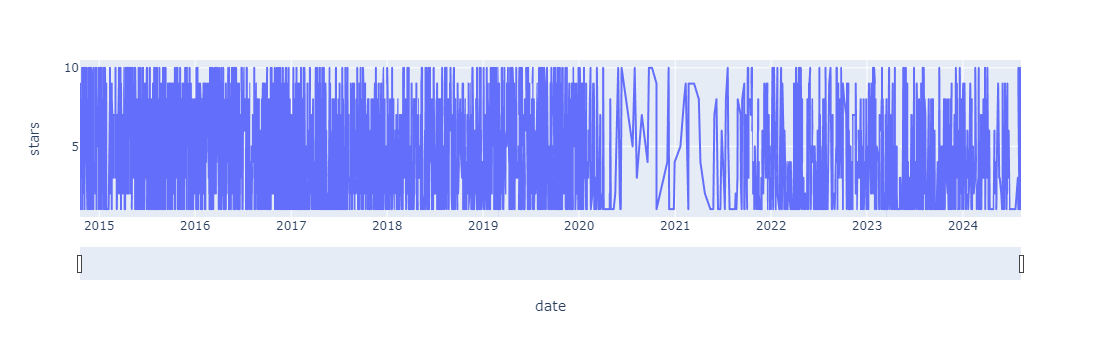

In [54]:
fig = px.line(df, x='date', y="stars")
fig.update_xaxes(rangeslider_visible=True)
fig.show()

It can be seen that between April 2020 to August 2021 there has been a decline in reviews due to Covid Pandemic travel restrictions. Not much can be inferred at this point as the dates we have are the when the customers posted their reviews which does not take into account the actual flight date. Hence no particular significan trend is visible from the plot.

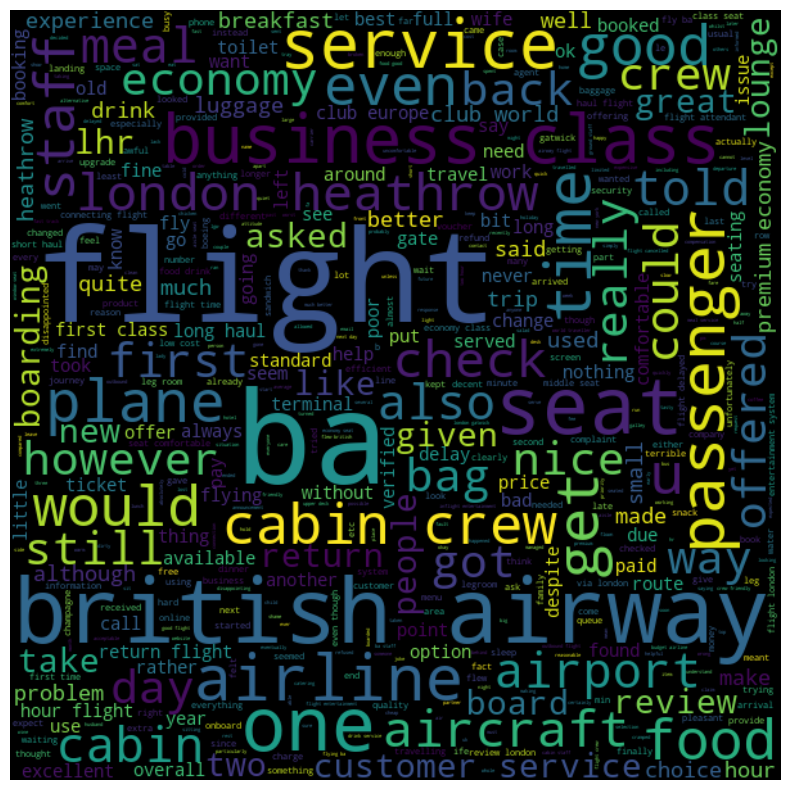

In [57]:
import nltk
from nltk.corpus import stopwords
# Start with one review:
reviews = " ".join(df.corpus)
plt.figure(figsize=(20,10))

stopwords = set(stopwords.words('english'))

# Create and generate a word cloud image:
wordcloud = WordCloud(height=600,width=600,max_font_size=100, max_words=500, stopwords=stopwords).generate(reviews)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

There are many words that does not set the idea of whether the review is positive or negative. For example words like "passenger", "flight", etc. does not add conlcusive value hence we can include them in stopwords list. 


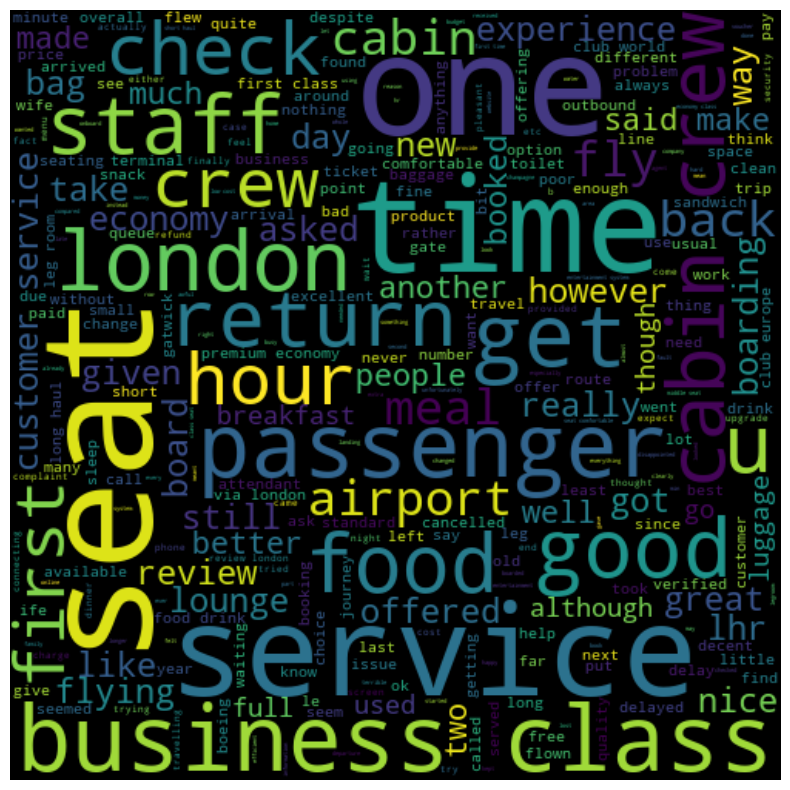

In [60]:
import nltk
from nltk.corpus import stopwords
reviews = " ".join(df.corpus)
plt.figure(figsize=(20,10))

stopwords = set(stopwords.words('english'))
stopwords.update(["ba","flight", "british","airway", "airline","plane", "told","also","passenger" \
                 "london", "heathrow", "aircraft", "could","even", "would"])
# Create and generate a word cloud image:
wordcloud = WordCloud(height=500,width=500,max_font_size=100, max_words=300, stopwords=stopwords).generate(reviews)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Word Frequency

In [65]:
from nltk import ngrams
from nltk.probability import FreqDist

from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer

#split the text of all reviews into a list of words
words = reviews.split(" ")

#remove certain words that will not be used to determine the positive or negative sentiment
stopwords = text.ENGLISH_STOP_WORDS.union(['flight', 'ba', "passenger","u", "london","airway","british","airline",\
                                           "heathrow","plane","lhr","review"])


new_words = [word for word in words if word not in stopwords]

nlp_words=FreqDist(new_words).most_common(20)

#create a dataframe of these word and its frequencies
all_fdist = pd.Series(dict(nlp_words))

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'seat'),
  Text(1, 0, 'service'),
  Text(2, 0, 'time'),
  Text(3, 0, 'food'),
  Text(4, 0, 'crew'),
  Text(5, 0, 'cabin'),
  Text(6, 0, 'good'),
  Text(7, 0, 'class'),
  Text(8, 0, 'hour'),
  Text(9, 0, 'business'),
  Text(10, 0, 'staff'),
  Text(11, 0, 'economy'),
  Text(12, 0, 'check'),
  Text(13, 0, 'drink'),
  Text(14, 0, 'meal'),
  Text(15, 0, 'return'),
  Text(16, 0, 'lounge'),
  Text(17, 0, 'club'),
  Text(18, 0, 'customer'),
  Text(19, 0, 'boarding')])

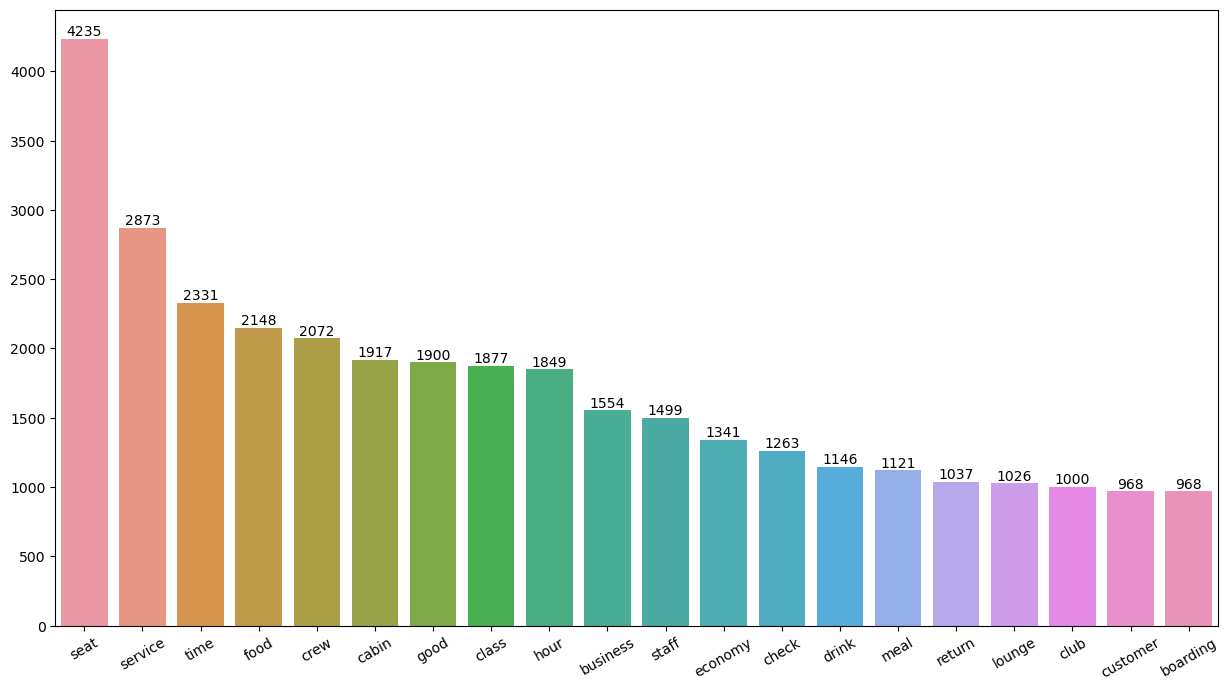

In [67]:
## Setting figure, ax into variables
fig, ax = plt.subplots(figsize=(15,8))

## Seaborn plotting using Pandas attributes + xtick rotation for ease of viewing
all_plot = sns.barplot(x=all_fdist.index, y=all_fdist.values, ax=ax)
all_plot.bar_label(all_plot.containers[0])
plt.xticks(rotation=30)

This gives us a glimpse of what customers are really talking about here. We see that Seat is most talked about the airline followed by "Service" and "food" which are all very important to customers in terms of service. However, we still do not know is how they are expressing about each of this service. To bring some significane to these terms we will use ngram plots to see if they are bad or good in experience. 

## Word Frequency with N-gram

<Axes: >

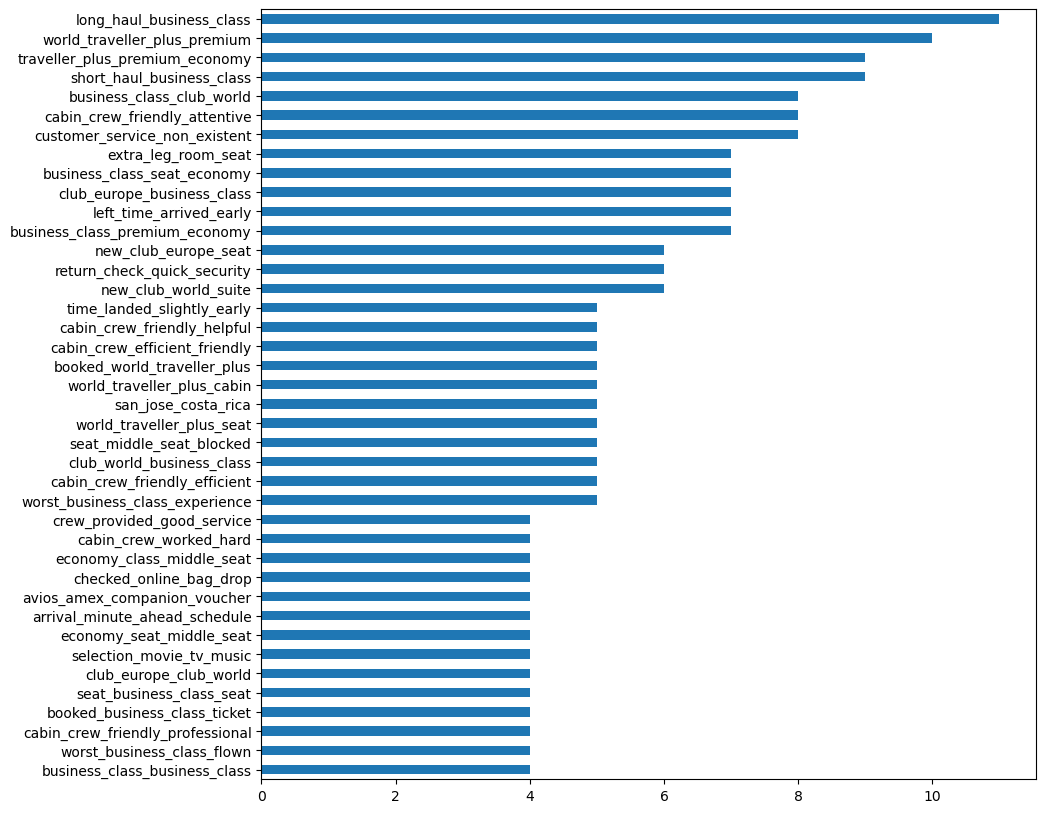

In [69]:
## Imports
import nltk.collocations as collocations
from nltk import FreqDist, bigrams

reviews = " ".join(df.corpus)

#split the text of all reviews into a list of words
words = reviews.split(" ")

new_words = [word for word in words if word not in stopwords]

def get_freq_dist(new_words,number_of_ngrams ):
    from nltk import ngrams
    
    ## Generate bigrams
    ngrams = ngrams(new_words, number_of_ngrams)

    ## Creating FreqDist
    ngram_fd = FreqDist(ngrams).most_common(40)

    ## Sort values by highest frequency
    ngram_sorted = {k:v for k,v in sorted(ngram_fd, key=lambda item:item[1])}

    ## Join bigram tokens with '_' + maintain sorting
    ngram_joined = {'_'.join(k):v for k,v in sorted(ngram_fd, key=lambda item:item[1])}

    ## Convert to Pandas series for easy plotting
    ngram_freqdist = pd.Series(ngram_joined)
    plt.figure(figsize=(10,10))
    ax = ngram_freqdist.plot(kind="barh")
    
    return ax


get_freq_dist(new_words,4)

We can see that there are very common positive terms regarding cabin crew. For example, cabin_crew_friendly_helpful, cabin_crew_friendly_attentive, cabin_crew_friendly_efficient, etc. So certainly customers are providing good reviews about cabin crew staff of British Airways. 

However, there is one another approach that we can try to find the word frequencies which will give us better idea. We will group the reviews based on ratings. Say, we assume ratigs 1-3 are bad reviews, 4-6 are average/good experience and 7-10 indicates a great experience. 

In [261]:
ratings_1_3 = df[df.stars.isin([1,2,3])]
ratings_4_6 = df[df.stars.isin([4,5,6])]
ratings_7_10 = df[df.stars.isin([7,8,9,10])]

<Axes: >

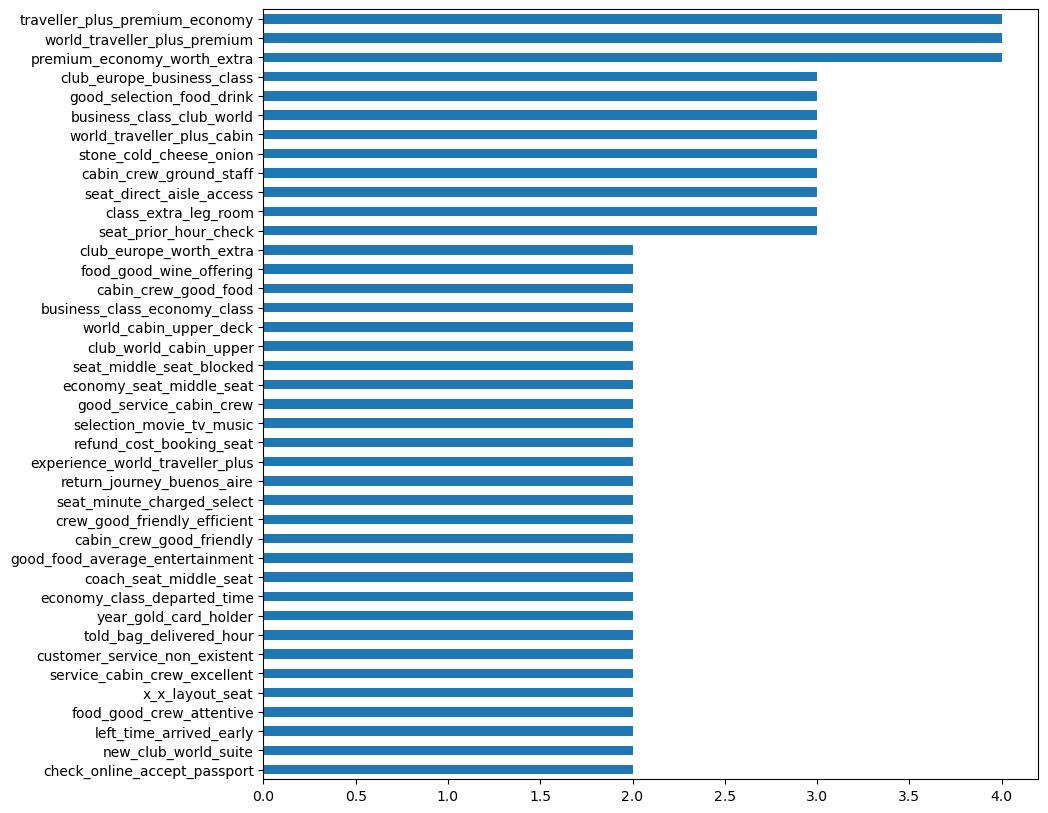

In [263]:
reviews_1_3 = " ".join(ratings_1_3.corpus)
reviews_4_6 = " ".join(ratings_4_6.corpus)
reviews_7_10 = " ".join(ratings_7_10.corpus)

#split the text of all reviews into a list of words
words_1_3 = reviews_1_3.split(" ")
words_4_6 = reviews_4_6.split(" ")
words_7_10 = reviews_7_10.split(" ")


new_words_7_10 = [word for word in words_7_10 if word not in stopwords]

get_freq_dist(new_words_7_10,4)

<Axes: >

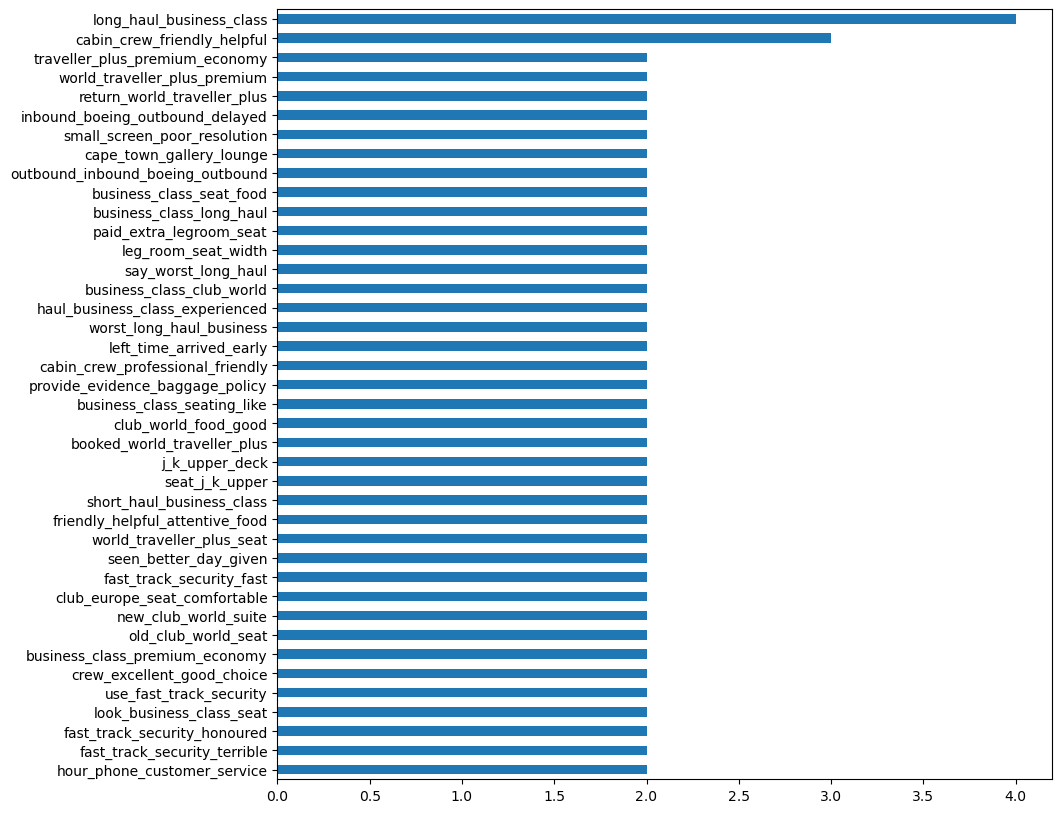

In [265]:

new_words = [word for word in words_4_6 if word not in stopwords]

get_freq_dist(new_words,4)

<Axes: >

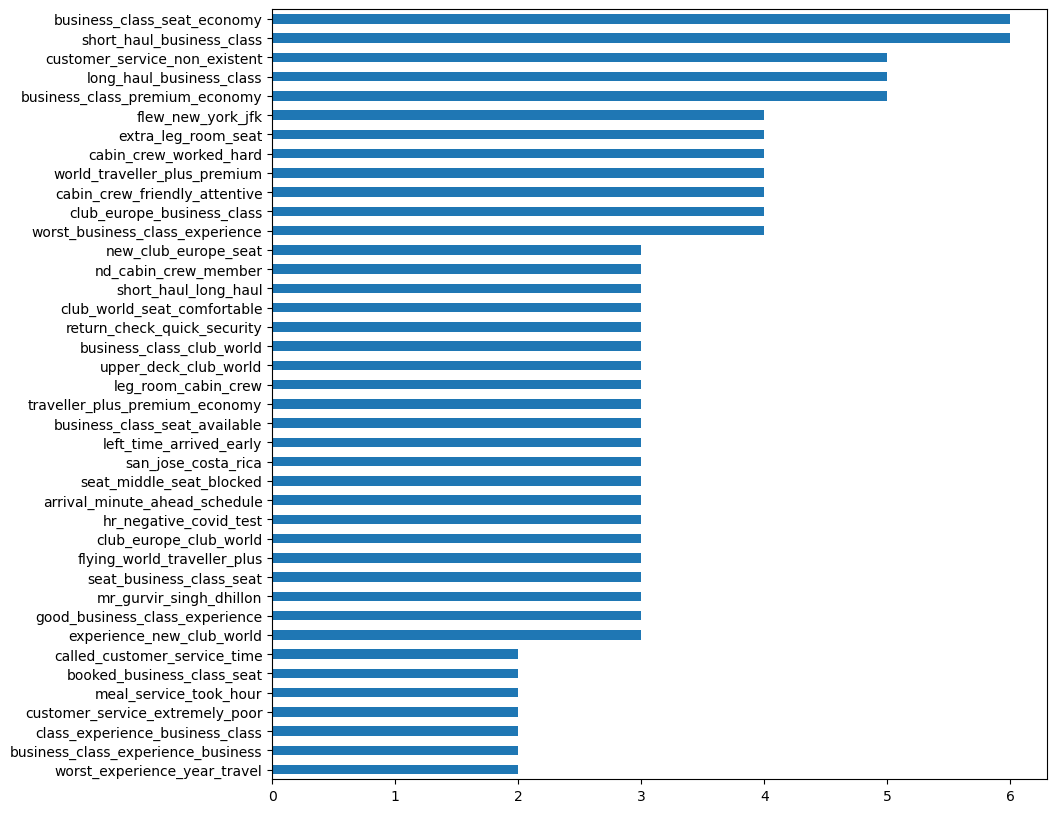

In [267]:
new_words = [word for word in words_1_3 if word not in stopwords]

get_freq_dist(new_words,4)

****

Now we will use textblob library to define if the text is negative or positive and to what extent


In [275]:
%%capture
!pip install textblob
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer

#set a column Polarity with all 0 values initially
df['polarity'] = 0

for i in range(len(df.corpus)):
    sent= TextBlob(df.corpus[i])
    polarity  = sent.sentiment.polarity
    subjectivity  = sent.sentiment.subjectivity
    df['polarity'][i] = polarity

In [277]:
# let's see how many texts are with positive comments

print(f"{df[(df['polarity'] >-0.2) & (df['polarity'] <0.2)].shape[0]} number of reviews between -0.2 and 0.2 polarity score")

print(f"{df[(df['polarity'] >-0.1) & (df['polarity'] <0.1)].shape[0]} number of reviews between -0.1 and 0.1 polarity score")


2397 number of reviews between -0.2 and 0.2 polarity score
1397 number of reviews between -0.1 and 0.1 polarity score


Polarity score is given between -1 to 1 and more close the value to -1, it indicates negative review and vice versa is true for positive value. If we consider a threshold where any review with polarity greater than 0.2 is positive and less than -0.2 is negative, we are left with 2286 reviews that lies in the neutral zone. To further narrow down this number of neutral reviews, let's take the threshold of 0.1. 

We will try another method of labelling the reveiws as positives or negatives. In this we will use VADER algorihtm by nltk library. 

In [99]:
%%capture
import nltk
nltk.download('vader_lexicon')

from nltk.sentiment.vader import SentimentIntensityAnalyzer 
vds = SentimentIntensityAnalyzer()
# text = 'This is an extremely entertaining movie'

#set a column Polarity with all 0 values initially
df['label'] = 0
    
for i in range(len(df.corpus)):
    
    score = vds.polarity_scores(df.corpus[i])['compound']
    #print(score)
    if score > 0.2:
        df['label'][i] = 1
        #print("1st")
    elif score < 0:
        df['label'][i] = -1
        #print("2nd")
    else:
        df['label'][i] = 0

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\theak\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [101]:
df.label.value_counts()

label
 1    2189
-1    1184
 0     122
Name: count, dtype: int64

## Topic Modeling with LDA
We have already cleaned our reviews, however, for topic modeling we will also require word embeddings or (words matrix). For this purpose we will use count vectorizer method from sklearn library. 

In [80]:
%%capture
from sklearn.feature_extraction.text import CountVectorizer

#create an object of count vectorizer
vect = CountVectorizer()

#apply transformation
tf = vect.fit_transform(df.corpus).toarray()
tf_feature_names = vect.get_feature_names_out()


In [82]:
from sklearn.decomposition import LatentDirichletAllocation

#declare the number of topics
number_of_topics = 8

model = LatentDirichletAllocation(n_components=number_of_topics, random_state=0)

#fit the term frequency data to the model
model.fit(tf)

#create empty dictionary to store key value pair of topic number and its weights
topic_dict = {}

#loop through model components 
for topic_idx, topic in enumerate(model.components_):
    topic_dict["Topic %d words" % (topic_idx)]= ['{}'.format(tf_feature_names[i])
            for i in topic.argsort()[:-10 - 1:-1]]
    topic_dict["Topic %d weights" % (topic_idx)]= ['{:.1f}'.format(topic[i])
            for i in topic.argsort()[:-10 - 1:-1]]
    
df_topic =pd.DataFrame(topic_dict)

In [85]:
df_topic

Topic 0 words Topic 0 weights Topic 1 words Topic 1 weights Topic 2 words  \
0        flight          1863.8            ba           888.1        flight   
1          hour           736.7        flight           799.4            ba   
2        london           607.2          seat           357.5      customer   
3            ba           487.5       airline           292.8          told   
4      heathrow           447.4       service           261.0       british   
5          time           434.7          time           243.5        airway   
6        airway           425.9         cabin           215.0           get   
7       british           425.8          crew           213.4         would   
8         check           401.4          food           188.2       service   
9        minute           388.3        london           187.2           day   

  Topic 2 weights Topic 3 words Topic 3 weights Topic 4 words Topic 4 weights  \
0          1731.1          seat          2461.0          good           605.0   
1          1334.4         class          1572.5        lounge           520.5   
2           708.6      business          1280.2        flight           476.6   
3           623.7            ba          1086.3          crew           345.1   
4           606.5        flight          1035.9          club           304.3   
5           603.1       economy           906.7          food           269.9   
6           547.7       service           900.0      boarding           266.5   
7           543.3          food           891.9       service           258.1   
8           537.8         cabin           775.5          seat           251.1   
9           529.5        airway           624.1         drink           243.7   

  Topic 5 words Topic 5 weights Topic 6 words Topic 6 weights Topic 7 words  \
0        flight          1683.0       luggage            46.3        london   
1            ba           822.0          hand            21.7       british   
2          crew           802.6       airport            21.4           bag   
3          time           722.6      boarding            18.5        airway   
4          seat           718.1        option            17.8           via   
5          good           664.6            kg            17.5       airline   
6          meal           632.6         check            17.1       service   
7          food           626.3        warsaw            16.5          aviv   
8         cabin           617.3           got            15.2        flight   
9       service           553.9          pram            15.1         staff   

  Topic 7 weights  
0            25.2  
1            23.6  
2            22.4  
3            21.9  
4            21.6  
5            20.4  
6            19.0  
7            17.5  
8            17.5  
9            14.2

There are certain words that are not useful to detect the tone of the reviews overall like "britsh airways", "passenger", "flight", etc.

## Topic modeling with NMF

In [89]:
from sklearn.decomposition import NMF
nmf = NMF(n_components=2, init='random', random_state=0)
nmf.fit_transform(tf)

array([[0.09228205, 0.        ],
       [0.07715093, 0.00826918],
       [0.01074812, 0.02480143],
       ...,
       [0.03684716, 0.03912016],
       [0.02234922, 0.07133409],
       [0.06059728, 0.0378678 ]])

In [91]:
topic_dict = {}

#loop through model components 
for topic_idx, topic in enumerate(nmf.components_):
    topic_dict["Topic %d words" % (topic_idx)]= ['{}'.format(tf_feature_names[i])
            for i in topic.argsort()[:-10 - 1:-1]]
    topic_dict["Topic %d weights" % (topic_idx)]= ['{:.1f}'.format(topic[i])
            for i in topic.argsort()[:-10 - 1:-1]]
    
df_topic =pd.DataFrame(topic_dict)

In [93]:
df_topic

Topic 0 words Topic 0 weights Topic 1 words Topic 1 weights
0        flight            33.6          seat            16.7
1            ba            11.8            ba             9.2
2          hour             7.8         class             7.6
3          time             6.3      business             6.0
4        london             5.7       service             6.0
5        airway             5.6          food             5.8
6       british             5.6         cabin             5.7
7       service             5.3          crew             5.4
8         would             4.7          good             5.2
9           day             4.2       economy             4.6

With NMF algorithm as well we see there are few words that are not conclusive like "seat". So we will remove such words from the list and try topic modeling again. 